# Deep GP supervised learning

This notebook depends on [GPy](https://github.com/SheffieldML/GPy) and [PyDeepGP](https://github.com/SheffieldML/PyDeepGP). These libraries can be installed via pip:
```
pip install GPy
pip install git+https://github.com/SheffieldML/PyDeepGP.git
```

In [1]:
import mlai

In [4]:
import deepgp
import GPy
import teaching_plots as plot 
import numpy as np
%matplotlib inline
from pylab import *
from IPython.display import display
from gp_tutorial import ax_default, meanplot, gpplot

In [6]:
data=GPy.util.datasets.robot_wireless()
x = data['X']
x = np.linspace(0,1,215)[:, None]
y = data['Y']

layers = [y.shape[1], 10, 5, 5, 2, x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i, ARD=True)]

In [7]:
m = deepgp.DeepGP(layers,Y=y, X=x, inits=inits, 
                  kernels=kernels,
                  num_inducing=50, back_constraint=False)
m.obslayer.likelihood.variance[:] = y.var()*0.01
for layer in m.layers:
    layer.kern.variance.fix(warning=False)
    layer.likelihood.variance.fix(warning=False)


In [77]:
m.optimize(messages=False,max_iters=100)
for layer in m.layers:
    layer.kern.variance.constrain_positive(warning=False)
m.optimize(messages=False,max_iters=100)
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=True,max_iters=10000)

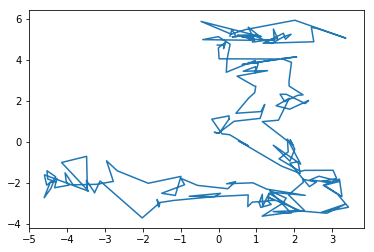

In [94]:
plt.plot(m.obslayer.latent_space.mean[:, 0], m.obslayer.latent_space.mean[:, 2])

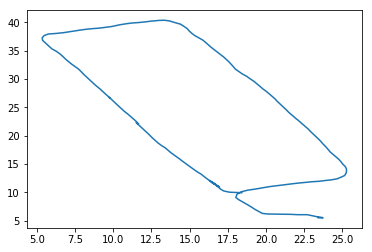

In [90]:
plt.plot(data['X'][:, 0], data['X'][:, 1])

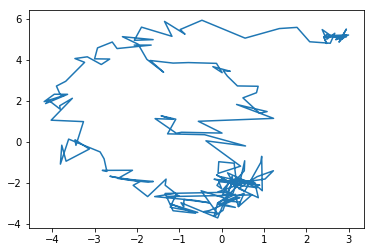

In [82]:
plt.plot(m.obslayer.latent_space.mean[:, 3],m.obslayer.latent_space.mean[:, 2])

In [54]:
xt = np.linspace(-0.2,1.2,200)[:,None]
yt = m.predict(xt)

In [55]:
yt[0]

array([[-0.41673167,  0.22552421, -0.44552299, ..., -0.14390213,
         0.10079337, -0.41649605],
       [-0.41672945,  0.22559249, -0.44552353, ..., -0.14391291,
         0.10078673, -0.41649767],
       [-0.4167244 ,  0.2257215 , -0.4455237 , ..., -0.14393355,
         0.1007768 , -0.41650087],
       ..., 
       [-0.41668003,  0.22560752, -0.44550414, ..., -0.14394438,
         0.10088595, -0.41650801],
       [-0.41670549,  0.22553358, -0.44551235, ..., -0.14391848,
         0.10084524, -0.4165012 ],
       [-0.41671909,  0.22549449, -0.44551682, ..., -0.14390494,
         0.10082395, -0.41649776]])

AttributeError: 'numpy.ndarray' object has no attribute 'figure'

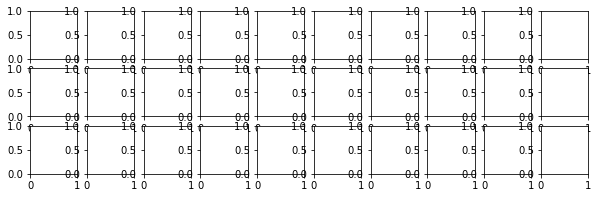

In [96]:
fig, ax = plt.subplots(3, 10, figsize=(10, 3))
for index in range(30):
    gpplot(xt,yt[0][:, index],
           yt[0][:, index]-2*np.sqrt(yt[1][:, index]),
           yt[0][:, index]+2*np.sqrt(yt[1][:, index]),
          ax=ax[index])
    #plot(x,y[:, index],'rx')
    xlabel('time')
    _=ylabel('strength')

In [8]:
data = GPy.util.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

Perform a Gaussian process fit on the data using GPy.

In [ ]:
GPy.GPregression(x, y)

In [10]:
m = deepgp.DeepGP([y.shape[1],5,x.shape[1]],Y=y, X=x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(5,ARD=True),GPy.kern.RBF(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)
m.obslayer.likelihood.variance[:] = y.var()*0.01
for layer in m.layers:
    layer.kern.variance.fix(warning=False)
    layer.likelihood.variance.fix(warning=False)

In [ ]:
m.optimize(messages=False,max_iters=100)
for layer in m.layers:
    layer.kern.variance.constrain_positive(warning=False)
m.optimize(messages=False,max_iters=100)
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=True,max_iters=10000)

### Plot the prediction

In [97]:
f, ax = plt.subplots(figsize=plot.one_figsize)
ax.plot(data['X'], data['Y'], 'ro',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
xt = np.linspace(1880,2020,200)[:,None]
yt = m.predict(xt)
gpplot(xt,yt[0],yt[0]-2*np.sqrt(yt[1]),yt[0]+2*np.sqrt(yt[1]))
plot(x,y,'r.')

xlabel('Year')
_=ylabel('Time given in pace (min per km)')

AttributeError: 'function' object has no attribute 'one_figsize'

### Fitted GP for each layer

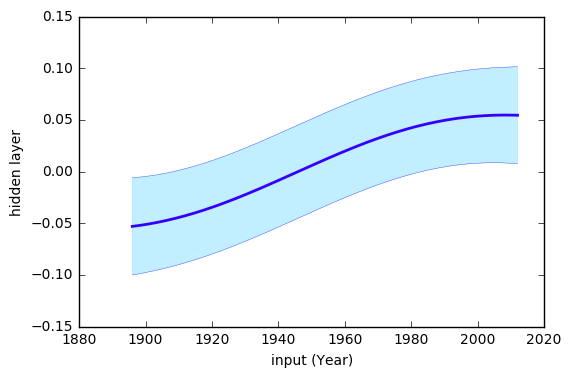

In [10]:
xt = np.linspace(x.min(),x.max(),200)[:,None]
yt = m.layer_1.predict(xt)
gpplot(xt,yt[0][:,0],yt[0][:,0:1]-2*np.sqrt(yt[1]),yt[0][:,0:1]+2*np.sqrt(yt[1]))
xlabel('input (Year)')
_=ylabel('hidden layer')

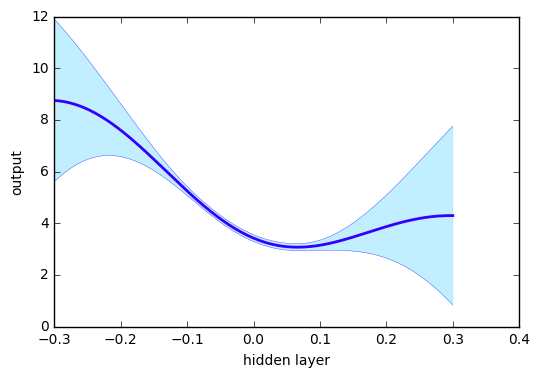

In [11]:
xt = np.zeros((200,5))
xt[:,0] = np.linspace(-0.3,0.3,200)
yt = m.obslayer.predict(xt)
gpplot(xt[:,0],yt[0],yt[0]-2*np.sqrt(yt[1]),yt[0]+2*np.sqrt(yt[1]))
xlabel('hidden layer')
_=ylabel('output')

In [24]:
num_data= 50
x = np.linspace(-1, 1, num_data)[:, None]
y = (x>0) + np.random.randn(num_data, 1)*0.01

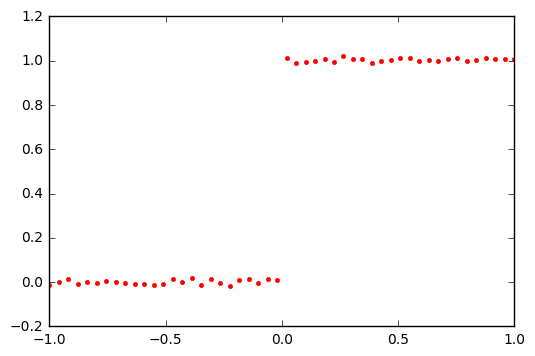

In [26]:
plt.plot(x, y, 'r.')

In [50]:
m = deepgp.DeepGP([y.shape[1], 1, 1, 1, 1, 1, 1, 1,x.shape[1]],Y=y, X=x, 
                  inits=['PCA','PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA', 'PCA'], 
                  kernels=[GPy.kern.RBF(1),GPy.kern.RBF(1),GPy.kern.RBF(1),GPy.kern.RBF(1),GPy.kern.RBF(1),
                           GPy.kern.RBF(1),GPy.kern.RBF(1),GPy.kern.RBF(x.shape[1])], # the kernels for each layer
                  num_inducing=20, back_constraint=False)
m.obslayer.likelihood.variance[:] = y.var()*0.01
for layer in m.layers:
    layer.kern.variance.fix(warning=False)
    layer.likelihood.variance.fix(warning=False)
display(m)

deepgp.,value,constraints,priors
obslayer.inducing inputs,"(20, 1)",,
obslayer.rbf.variance,1.0,+ve fixed,
obslayer.rbf.lengthscale,1.0,+ve,
obslayer.Gaussian_noise.variance,0.00252156135902,+ve fixed,
obslayer.Kuu_var,"(20,)",+ve,
obslayer.latent space.mean,"(50, 1)",,
obslayer.latent space.variance,"(50, 1)",+ve,
layer_1.inducing inputs,"(20, 1)",,
layer_1.rbf.variance,1.0,+ve fixed,
layer_1.rbf.lengthscale,1.0,+ve,


In [51]:
m.optimize(messages=1,max_iters=100)
for layer in m.layers:
    layer.kern.variance.constrain_positive(warning=False)
m.optimize(messages=1,max_iters=100)
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=1,max_iters=1000)

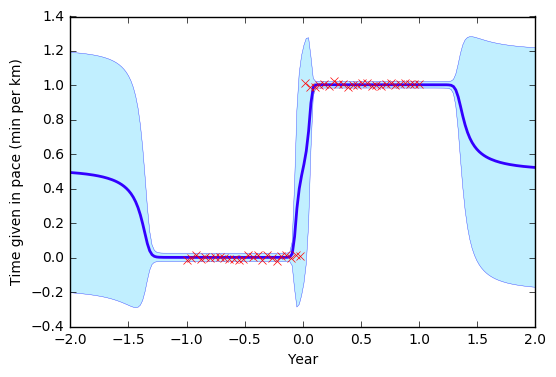

In [52]:
xt = np.linspace(x.min()*2,x.max()*2,200)[:,None]
yt = m.predict(xt)
gpplot(xt,yt[0],yt[0]-2*np.sqrt(yt[1]),yt[0]+2*np.sqrt(yt[1]))
plot(x,y,'rx')
xlabel('Year')
_=ylabel('Time given in pace (min per km)')

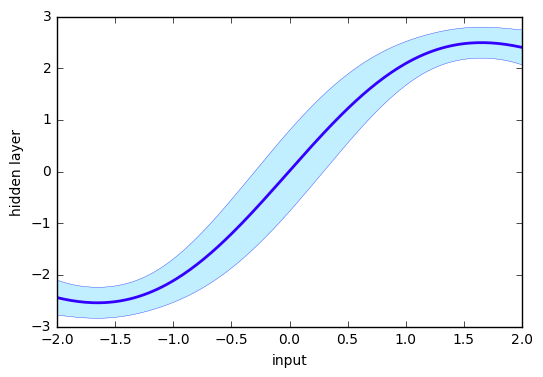

In [53]:
yt = m.layer_1.predict(xt)
gpplot(xt,yt[0][:,0],yt[0][:,0:1]-2*np.sqrt(yt[1]),yt[0][:,0:1]+2*np.sqrt(yt[1]))
xlabel('input')
_=ylabel('hidden layer')


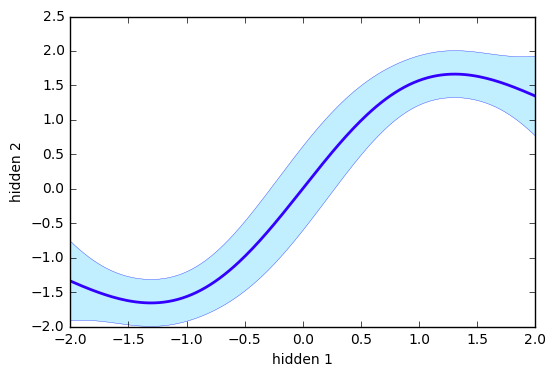

In [54]:
yt = m.layer_2.predict(xt)
gpplot(xt,yt[0][:,0],yt[0][:,0:1]-2*np.sqrt(yt[1]),yt[0][:,0:1]+2*np.sqrt(yt[1]))
xlabel('hidden 1')
_=ylabel('hidden 2')

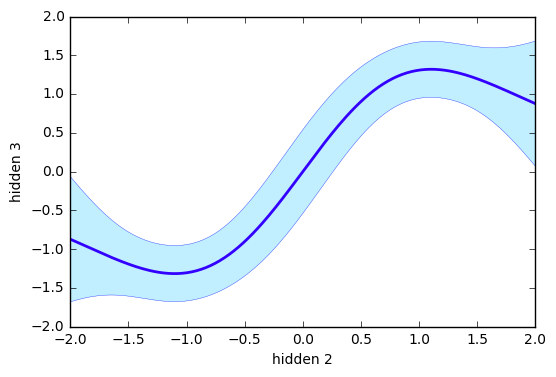

In [55]:
yt = m.layer_3.predict(xt)
gpplot(xt,yt[0][:,0],yt[0][:,0:1]-2*np.sqrt(yt[1]),yt[0][:,0:1]+2*np.sqrt(yt[1]))
xlabel('hidden 2')
_=ylabel('hidden 3')

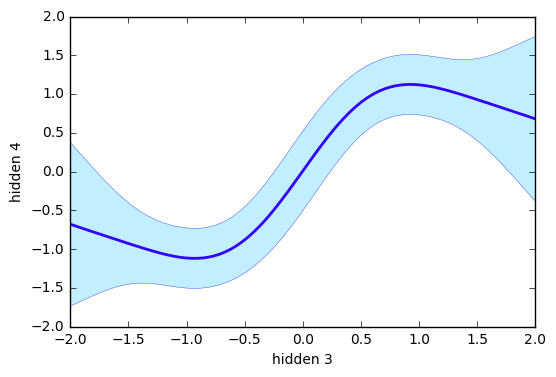

In [56]:
yt = m.layer_4.predict(xt)
gpplot(xt,yt[0][:,0],yt[0][:,0:1]-2*np.sqrt(yt[1]),yt[0][:,0:1]+2*np.sqrt(yt[1]))
xlabel('hidden 3')
_=ylabel('hidden 4')

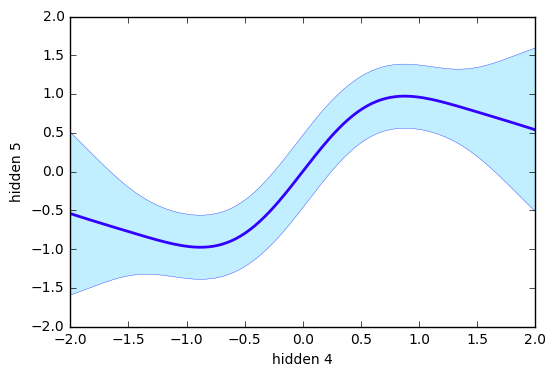

In [57]:
yt = m.layer_5.predict(xt)
gpplot(xt,yt[0][:,0],yt[0][:,0:1]-2*np.sqrt(yt[1]),yt[0][:,0:1]+2*np.sqrt(yt[1]))
xlabel('hidden 4')
_=ylabel('hidden 5')